In [10]:
import numpy as np
X = np.array([[0,0],[0,1]])
y = np.array([[0],[1]])

In [11]:
from sklearn.neural_network import MLPClassifier
#import warnings
#warnings.filterwarnings ("ignore")
clf = MLPClassifier(hidden_layer_sizes=4)
clf.fit(X,y)

MLPClassifier(hidden_layer_sizes=4)

In [12]:
clf.predict(np.array([[2,2]]))

array([0])

In [13]:
clf.predict(np.array([[-1,-2]]))

array([0])

In [14]:
clf.coefs_

[array([[-0.13769748,  0.01145726,  0.54681742,  0.00796113],
        [ 0.64357429,  0.48279598,  0.71359535, -0.4384216 ]]),
 array([[-0.55109275],
        [-0.95209105],
        [-0.89931968],
        [-1.09973292]])]

In [15]:
clf.intercepts_

[array([-0.66493263, -0.50187022, -0.73129745,  0.43811349]),
 array([0.02972144])]

In [16]:
from sklearn import datasets
iris = datasets.load_iris()

In [17]:
from sklearn.model_selection import train_test_split
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [33]:
import time
from sklearn.model_selection import cross_val_score

def MLPClassifier_fun_mdl (Nbr_HL,X_train,y_train,X_test) :
    
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = Nbr_HL)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict_proba(X_test)
    train_score = mlp.score(X_train, y_train)
    accuracies = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 10)
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    return accuracies.mean(), accuracies.std()

In [34]:
MLPClassifier_fun_mdl (35,X_train,y_train,X_test)

temps ecoule = 1.053612232208252


(0.885, 0.16132265804901677)

In [35]:
MLPClassifier_fun_mdl ((15,200),X_train,y_train,X_test)

temps ecoule = 1.9998672008514404


(0.9550000000000001, 0.09069178573608527)

In [36]:
MLPClassifier_fun_mdl ((12,47,90),X_train,y_train,X_test)

temps ecoule = 2.0273706912994385


(0.93, 0.10770329614269007)

In [37]:
MLPClassifier_fun_mdl ((50,100,150,250),X_train,y_train,X_test)

temps ecoule = 2.2619292736053467


(0.95, 0.09999999999999999)

In [38]:
MLPClassifier_fun_mdl ((25,150,15,300,240),X_train,y_train,X_test)

temps ecoule = 3.3425540924072266


(0.975, 0.075)

In [41]:
from sklearn.svm import SVC

def SVM_Fuc_poly (X_train,y_train, X_test): 
    
    start_time = time.time()
    classifier = SVC(kernel = 'poly', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    #train_score = classifier.score(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy of A SVM model: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation of A SVM model: {:.2f} %".format(accuracies.std()*100))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    return accuracies.mean(), accuracies.std()

In [42]:
SVM_Fuc_poly (X_train,y_train, X_test)

Accuracy of A SVM model: 95.00 %
Standard Deviation of A SVM model: 15.00 %
temps ecoule = 0.025821447372436523


(0.95, 0.15)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
MLPClassifier_fun_mdl (35,X_train,y_train,X_test)

temps ecoule = 1.002885103225708


(0.9099999999999999, 0.11135528725660043)

In [45]:
SVM_Fuc_poly (X_train,y_train, X_test)

Accuracy of A SVM model: 95.00 %
Standard Deviation of A SVM model: 15.00 %
temps ecoule = 0.03171133995056152


(0.95, 0.15)

In [46]:
from sklearn.model_selection import GridSearchCV
parameter = {
                        'hidden_layer_sizes': [(50,50,50), (50,100,50)],
                        'activation': ['tanh', 'relu'],
                        'solver': ['sgd', 'adam', 'L-BFGS' ],
                        'alpha': [0.0001, 0.05],
                        'learning_rate_init': [0.5,0.1, 0.01, 0.001],
                        'max_iter': [100,200,250,1000]
                        }
clf=MLPClassifier()
qlf=GridSearchCV (clf, parameter, n_jobs=-1, cv=8)
qlf.fit(X_train, y_train)
print (qlf.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.1, 'max_iter': 100, 'solver': 'adam'}


In [47]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

df = fetch_openml("mnist_784")

In [48]:
df.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


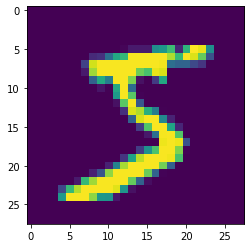

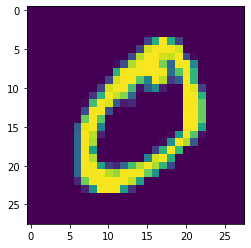

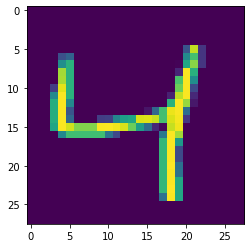

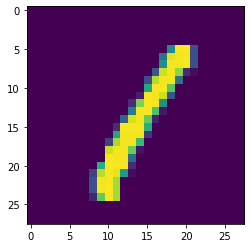

In [50]:
import matplotlib.pyplot as plt
lotImage = df.data.to_numpy()

for i in range(4):
    plt.imshow((lotImage[i].reshape(28,28)))
    plt.show()

In [51]:
import time 
from sklearn.metrics import accuracy_score

X_train = df.data[:60000]
X_test = df.data[60000:]
y_train = df.target[:60000]
y_test = df.target[60000:]

In [52]:
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.9628
--- 274.0316090583801 seconds ---


In [53]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.9747
--- 134.8828580379486 seconds ---


In [ ]:
parametres = {'hidden_layer_sizes':[(50),(50,50),(50,50,50)],
             'activation':["identity","logistic","tanh","relu"],
             'solver':["lbfgs","sgd","adam"],
             'alpha':[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1],
             'learning_rate':["constant","invscaling","adaptive"]}

mlp_clf = MLPClassifier()
gridS_mlp = GridSearchCV(mlp_clf, parametres, cv=3, n_jobs=4)
gridS_mlp.fit(X_train_scaler, y_train)


print(gridS_mlp.best_params_)